In [353]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [354]:
df = pd.read_csv('ex1data1.txt')
df.columns = ['population','profit']

In [355]:
#population on x-axis
#profit on y-axis
x = np.array(df['population'])
y = np.array(df['profit'])

x_train = x[0:81]
y_train = y[0:81]

x_test = x[81:96]
y_test = y[81:96]

x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

x_norm = (x-x_mean)/x_std
y_norm = (y-y_mean)/y_std

print(x.shape[0])


96


In [363]:
# model is a linear equation of type "y = wx+b"
m = x.shape[0]
alpha = 0.1

In [364]:
class grad_descent:
    def __init__(self, w: float, b: float):
        self.w = w
        self.b = b

    def compute_cost_function(self, x, y):
        h = (self.w*x)+self.b
        J = (1/(2*m))*(np.sum((h-y)**2))
        return J

    def gradient_descent(self, x, y, alpha):
        h = (self.w*x)+self.b
        dw = (1/m)*(np.sum(np.dot((h-y), x)))
        db = (1/m)*(np.sum(h-y))
        self.w = self.w-(alpha*dw)
        self.b = self.b-(alpha*db)
        loss = self.compute_cost_function(x, y)
        #print(loss)
    
    def eval(self,x_test,y_test):
        print(self.w)
        print(self.b)
        y_val_predicted = ((self.w*x_test)+self.b)
        loss = y_val_predicted-y_test
        return y_val_predicted
        



In [334]:
print(x_test)
print(y_test)

[ 6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594  5.7077
  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[0.67861 7.5435  5.3436  4.2415  6.7981  0.92695 0.152   2.8214  1.8451
 4.2959  7.2029  1.9869  0.14454 9.0551  0.61705]


[10.75537266  8.73458931  7.0977548   5.77191885  4.69799172  3.82811075
  3.12350717  2.55277826  2.09048785  1.71603262  1.41272388  1.1670438
  0.96804293  0.80685223  0.67628777  0.57053055  0.4848672   0.41547989
  0.35927617  0.31375115  0.27687589  0.24700693  0.22281307  0.20321605
  0.18734245  0.17448485  0.16407018  0.15563431  0.14880124  0.14326647
  0.13878329  0.13515193  0.13221052  0.12982798  0.12789812  0.12633493
  0.12506875  0.12404315  0.12321241  0.12253951  0.12199446  0.12155297
  0.12119536  0.1209057   0.12067108  0.12048103  0.12032709  0.1202024
  0.1201014   0.12001959  0.11995333  0.11989965  0.11985618  0.11982096
  0.11979244  0.11976933  0.11975062  0.11973546  0.11972318  0.11971323
  0.11970517]


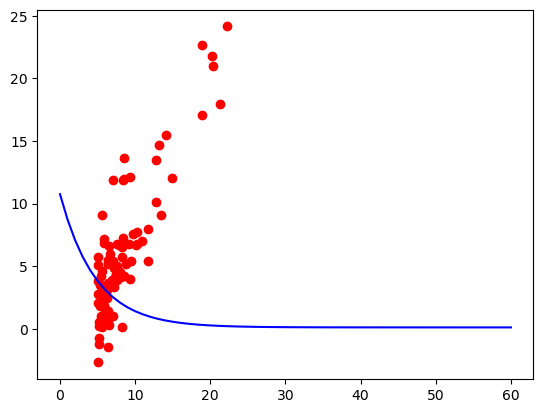

[ 6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594  5.7077
  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[0.67861 7.5435  5.3436  4.2415  6.7981  0.92695 0.152   2.8214  1.8451
 4.2959  7.2029  1.9869  0.14454 9.0551  0.61705]
0.8710114152471069
0.00820838364794936
 y_val_predicted : [ 5.54409564  8.5168576   5.68363166  7.42678681  8.00426738  5.2360189
  4.8165398   4.41500354  4.97968024  6.65977416  5.1216551   4.62927235
  7.23185445 11.67453528  4.74381035]


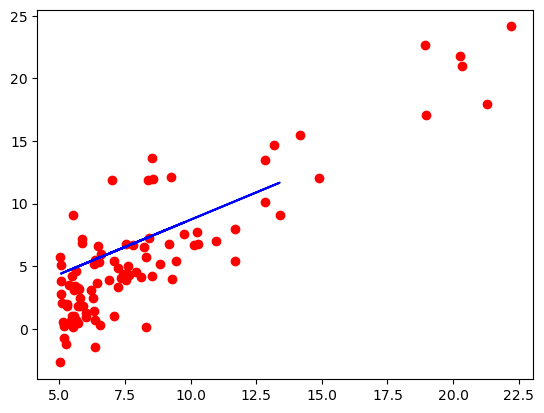

In [391]:
instance = grad_descent(0.2345,4.5678)
J = np.array([instance.compute_cost_function(x_norm,y_norm)])
for ephoc in range(60):
    instance.gradient_descent(x_norm,y_norm,alpha)
    J = np.concatenate((J, [instance.compute_cost_function(x_norm, y_norm)]))

print(J)
plt.plot(x,y, 'ro', label='Original data')
plt.plot(J, 'b' ,label = "loss function")
plt.show()

print(x_test)
print(y_test)
y_val_predicted = instance.eval(x_test,y_test)
print(f' y_val_predicted : {y_val_predicted}')
plt.plot(x,y, 'ro', label='Original data')
plt.plot(x_test, y_val_predicted, 'b', label='Fitted line')
plt.show()


In [379]:
w = 0.2345
b = 4.5678
h = (w*x)+b
dw = (1/m)*(np.sum(np.dot((h-y), x)))
db = (1/m)*(np.sum(h-y))
print(dw)
print(db)

-8.322944779461611
0.7695705442708334


In [336]:
print(df)

    population    profit
0       5.5277   9.13020
1       8.5186  13.66200
2       7.0032  11.85400
3       5.8598   6.82330
4       8.3829  11.88600
..         ...       ...
91      5.8707   7.20290
92      5.3054   1.98690
93      8.2934   0.14454
94     13.3940   9.05510
95      5.4369   0.61705

[96 rows x 2 columns]


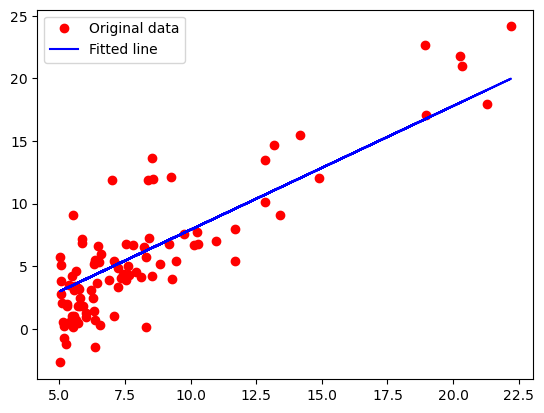

In [392]:
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)  # Reshape to Nx1
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to Nx1

# Model definition
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(150):
    # Forward pass
    y_predicted = model(x_tensor)
    
    # Compute loss
    loss = criterion(y_predicted, y_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update weights
    optimizer.step()

# Plotting
predicted = model(x_tensor).detach().numpy()
plt.plot(x_tensor, y_tensor, 'ro', label='Original data')
plt.plot(x_tensor, predicted, 'b', label='Fitted line')
plt.legend()
plt.show()

In [338]:
x_test_tesor = torch.tensor(x_test,dtype = torch.float32).view(-1,1)
print(model(x_test_tesor).detach().numpy())
print(y_test)

[[ 4.2526765]
 [ 7.687896 ]
 [ 4.4139194]
 [ 6.4282494]
 [ 7.095565 ]
 [ 3.8966737]
 [ 3.4119382]
 [ 2.947937 ]
 [ 3.6004577]
 [ 5.5419154]
 [ 3.7645187]
 [ 3.1955385]
 [ 6.2029915]
 [11.336799 ]
 [ 3.3278947]]
[0.67861 7.5435  5.3436  4.2415  6.7981  0.92695 0.152   2.8214  1.8451
 4.2959  7.2029  1.9869  0.14454 9.0551  0.61705]


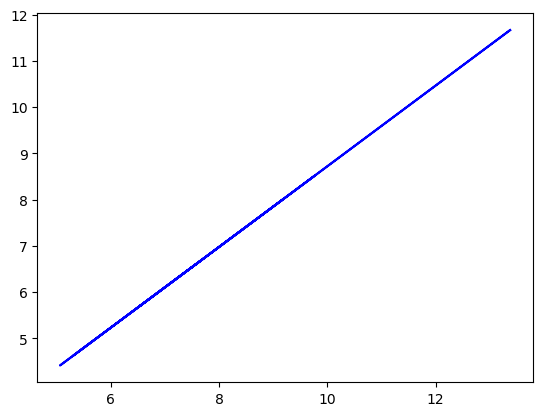

In [350]:
plt.plot(x_test, y_val_predicted, 'b', label='Fitted line')  

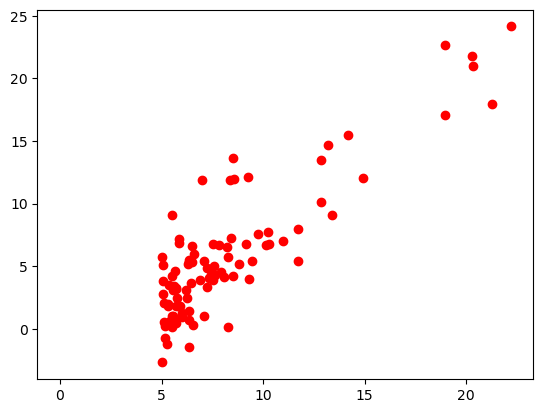

In [371]:
J = instance.compute_cost_function(x_norm,y_norm)
plt.plot(x,y, 'ro', label='Original data')
plt.plot(J, 'b' ,label = "loss function")
plt.show()

In [368]:
print(J)

0.11967082903300766


(46, 3)


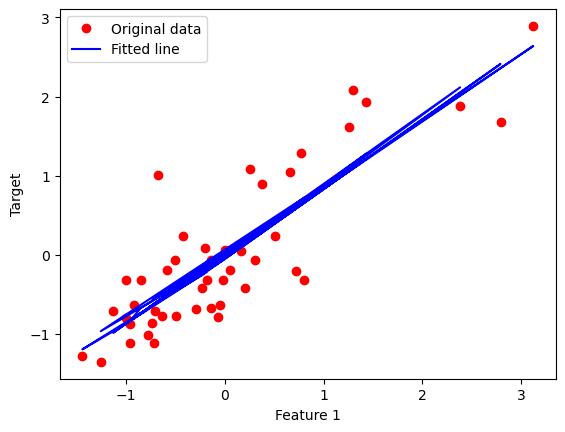

In [466]:
#Linear Regression with multiple Variables
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

df = pd.read_csv('ex1data2.txt')
df.columns = ['Area','no_of_bedrooms','price']
print(df.shape)


#normalisation
x_area = np.array(df['Area'].values)
x_noOfBedrroms = np.array(df['no_of_bedrooms'].values)

x_area_mean = np.mean(x_area)
x_noOfBedrroms_mean = np.mean(x_noOfBedrroms)
x_area_std = np.std(x_area)
x_noOfBedrroms_std = np.std(x_noOfBedrroms)

x_area = (x_area-x_area_mean)/x_area_std
x_noOfBedrroms = (x_noOfBedrroms-x_noOfBedrroms_mean)/x_noOfBedrroms_std

y = np.array(df['price'])
y_mean = np.mean(y)
y_std = np.std(y)
y = (y-y_mean)/y_std


x = np.concatenate((x_area[:, np.newaxis], x_noOfBedrroms[:, np.newaxis]), axis=1)



x_tensor = torch.tensor(x, dtype = torch.float32)
y_tensor = torch.tensor(y, dtype = torch.float32).view(-1,1)

input_size = 2
output_size = 1

model = nn.Linear(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for epoch in range(105):
    y_predicted = model(x_tensor)
    loss = criterion(y_predicted,y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


predicted = model(x_tensor).detach().numpy()

plt.plot(x[:, 0], y, 'ro', label='Original data')
plt.plot(x[:, 0], predicted, 'b', label='Fitted line')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()


In [417]:
x = df[['Area','no_of_bedrooms']].values

In [445]:
x = np.concatenate(x_area,x_noOfBedrroms)

TypeError: only integer scalar arrays can be converted to a scalar index

In [442]:
x_area = np.array(df['Area'])
x_noOfBedrroms = np.array(df['no_of_bedrooms'])
x_area_mean = np.mean(x_area)
x_noOfBedrroms_mean = np.mean(x_noOfBedrroms)
x_area_std = np.std(x_area)
x_noOfBedrroms_std = np.std(x_noOfBedrroms)

x_area = (x_area-x_area_mean)/x_area_std
x_noOfBedrroms = (x_noOfBedrroms-x_noOfBedrroms_mean)/x_noOfBedrroms_std